In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import math
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [33]:
import pandas as pd

import seaborn as sns
import numpy as np
import random
import re
import matplotlib.pyplot as plt
from datetime import date

plt.rcParams['figure.figsize'] = (20, 12) 
import yfinance as yf
pd.set_option('display.max_columns', 500)

In [34]:
def dpna(x):
    x.dropna(inplace=True)
    x.reset_index(drop=True,inplace=True)
    return x

def dr(x):
    drp=[]
    yes=[]
    #x['Open'].astype(float)
    for i in range(len(x['Open'])): 
            
        if i>0:
            drp.append((x['Open'][i]-x['Open'][i-1])/x['Open'][i-1]*100)
            if (x['Open'][i]-x['Open'][i-1])>0:
                yes.append(1)
            else:
                yes.append(0)
        else:
            drp.append(0)
            yes.append(np.nan)

    x['%_Daily_Return']=drp
    x['Yesterday_Price_Change']=yes  
        
    return x


def tr(x):
    dc=[]
    dcp=[]
    tmr=[]
    for i in range(len(x['Open'])): 
            
        if i!=(len(x['Open'])-1):
            dcp.append((x['Close'][i]-x['Open'][i])/x['Open'][i])
            if (x['Close'][i]-x['Open'][i])>0:
                dc.append(1)   
            else:
                dc.append(0)
            if (x['Close'][i+1]-x['Close'][i])>0:
                tmr.append(1)
            else:
                tmr.append(0)
                
        else:
            dcp.append(np.nan)
            dc.append(np.nan)
            tmr.append(np.nan)
        
    x['%_Daily_Change']=dcp
    x['Daily_Change']=dc
    x['tmr_Change']=tmr
        
        
    return x



In [35]:
#NASDAQ Composite (^IXIC), Dow Jones =DJI, S&P500=GSPC, 13 Week Treasury Bill (^IRX), Treasury Yield 5 Years (^FVX), Treasury Yield 10 Years (^TNX), Treasury Yield 30 Years (^TYX)

Index=['^IXIC','^DJI','^GSPC']
Stock=['AAPL','MSFT','AMZN','FB','GOOG','GOOGL','TSLA','NVDA','ASML','INTC','CMCSA','NFLX','ADBE','CSCO','PEP','AVGO','TXN','TMUS']
Bond=['^IRX','^FVX','^TNX','^TYX']
Currency=['CNY=X','GBP=X','JPY=X','EUR=X','CAD=X']
col_list=Index+Stock+Bond+Currency

df=pd.DataFrame()

for i in col_list:
    data = yf.download(i, start="2013-01-01")
    data=dr(data)
    data=tr(data)
    col1_list=[i+'_'+j for j in data.columns]
    data.columns=col1_list
    data=data.loc[:, (data != 0.0).any(axis=0)]
    
    df=pd.DataFrame().join([df,data], how="outer")


#df.dropna(axis=0,inplace=True)
#df.reset_index(drop=True, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [36]:
df.reset_index(inplace=True)

In [37]:
df.Date=pd.to_datetime(df.Date)
df['DayOfWeek']=df['Date'].apply(lambda x:x.strftime('%w'))
df['Year']=df['Date'].apply(lambda x:x.strftime('%Y'))
df['Month']=df['Date'].apply(lambda x:x.strftime('%m'))

In [38]:
df.dropna(inplace=True)

In [39]:
DayOfWeek = pd.get_dummies(df['DayOfWeek'])
Year = pd.get_dummies(df['Year'])
Month = pd.get_dummies(df['Month'])

In [40]:
DayOfWeek.columns=['DayOfWeek_1','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5']

In [41]:
Year.columns=['Year_2013','Year_2014','Year_2015','Year_2016','Year_2017','Year_2018','Year_2019','Year_2020','Year_2021','Year_2022']

In [42]:
Month.columns=['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']

In [43]:
df = pd.concat([df, DayOfWeek, Year, Month], axis=1)
df

,Date,^IXIC_Open,^IXIC_High,^IXIC_Low,^IXIC_Close,^IXIC_Adj Close,^IXIC_Volume,^IXIC_%_Daily_Return,^IXIC_Yesterday_Price_Change,^IXIC_%_Daily_Change,^IXIC_Daily_Change,^IXIC_tmr_Change,^DJI_Open,^DJI_High,^DJI_Low,^DJI_Close,^DJI_Adj Close,^DJI_Volume,^DJI_%_Daily_Return,^DJI_Yesterday_Price_Change,^DJI_%_Daily_Change,^DJI_Daily_Change,^DJI_tmr_Change,^GSPC_Open,^GSPC_High,^GSPC_Low,^GSPC_Close,^GSPC_Adj Close,^GSPC_Volume,^GSPC_%_Daily_Return,^GSPC_Yesterday_Price_Change,^GSPC_%_Daily_Change,^GSPC_Daily_Change,^GSPC_tmr_Change,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,AAPL_%_Daily_Return,AAPL_Yesterday_Price_Change,AAPL_%_Daily_Change,AAPL_Daily_Change,AAPL_tmr_Change,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,MSFT_%_Daily_Return,MSFT_Yesterday_Price_Change,MSFT_%_Daily_Change,MSFT_Daily_Change,MSFT_tmr_Change,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume,AMZN_%_Daily_Return,AMZN_Yesterday_Price_Change,AMZN_%_Daily_Change,AMZN_Daily_Change,AMZN_tmr_Change,FB_Open,FB_High,FB_Low,FB_Close,FB_Adj Close,FB_Volume,FB_%_Daily_Return,FB_Yesterday_Price_Change,FB_%_Daily_Change,FB_Daily_Change,FB_tmr_Change,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Adj Close,GOOG_Volume,GOOG_%_Daily_Return,GOOG_Yesterday_Price_Change,GOOG_%_Daily_Change,GOOG_Daily_Change,GOOG_tmr_Change,GOOGL_Open,GOOGL_High,GOOGL_Low,GOOGL_Close,GOOGL_Adj Close,GOOGL_Volume,GOOGL_%_Daily_Return,GOOGL_Yesterday_Price_Change,GOOGL_%_Daily_Change,GOOGL_Daily_Change,GOOGL_tmr_Change,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume,TSLA_%_Daily_Return,TSLA_Yesterday_Price_Change,TSLA_%_Daily_Change,TSLA_Daily_Change,TSLA_tmr_Change,NVDA_Open,NVDA_High,NVDA_Low,NVDA_Close,NVDA_Adj Close,NVDA_Volume,NVDA_%_Daily_Return,NVDA_Yesterday_Price_Change,NVDA_%_Daily_Change,NVDA_Daily_Change,NVDA_tmr_Change,ASML_Open,ASML_High,ASML_Low,ASML_Close,ASML_Adj Close,ASML_Volume,ASML_%_Daily_Return,ASML_Yesterday_Price_Change,ASML_%_Daily_Change,ASML_Daily_Change,ASML_tmr_Change,INTC_Open,INTC_High,INTC_Low,INTC_Close,INTC_Adj Close,INTC_Volume,INTC_%_Daily_Return,INTC_Yesterday_Price_Change,INTC_%_Daily_Change,INTC_Daily_Change,INTC_tmr_Change,CMCSA_Open,CMCSA_High,CMCSA_Low,CMCSA_Close,CMCSA_Adj Close,CMCSA_Volume,CMCSA_%_Daily_Return,CMCSA_Yesterday_Price_Change,CMCSA_%_Daily_Change,CMCSA_Daily_Change,CMCSA_tmr_Change,NFLX_Open,NFLX_High,NFLX_Low,NFLX_Close,NFLX_Adj Close,NFLX_Volume,NFLX_%_Daily_Return,NFLX_Yesterday_Price_Change,NFLX_%_Daily_Change,NFLX_Daily_Change,NFLX_tmr_Change,ADBE_Open,ADBE_High,ADBE_Low,ADBE_Close,ADBE_Adj Close,ADBE_Volume,ADBE_%_Daily_Return,ADBE_Yesterday_Price_Change,ADBE_%_Daily_Change,ADBE_Daily_Change,ADBE_tmr_Change,CSCO_Open,CSCO_High,CSCO_Low,CSCO_Close,CSCO_Adj Close,CSCO_Volume,CSCO_%_Daily_Return,CSCO_Yesterday_Price_Change,CSCO_%_Daily_Change,CSCO_Daily_Change,CSCO_tmr_Change,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Adj Close,PEP_Volume,PEP_%_Daily_Return,PEP_Yesterday_Price_Change,PEP_%_Daily_Change,PEP_Daily_Change,PEP_tmr_Change,AVGO_Open,AVGO_High,AVGO_Low,AVGO_Close,AVGO_Adj Close,AVGO_Volume,AVGO_%_Daily_Return,AVGO_Yesterday_Price_Change,AVGO_%_Daily_Change,AVGO_Daily_Change,AVGO_tmr_Change,TXN_Open,TXN_High,TXN_Low,TXN_Close,TXN_Adj Close,TXN_Volume,TXN_%_Daily_Return,TXN_Yesterday_Price_Change,TXN_%_Daily_Change,TXN_Daily_Change,TXN_tmr_Change,TMUS_Open,TMUS_High,TMUS_Low,TMUS_Close,TMUS_Adj Close,TMUS_Volume,TMUS_%_Daily_Return,TMUS_Yesterday_Price_Change,TMUS_%_Daily_Change,TMUS_Daily_Change,TMUS_tmr_Change,^IRX_Open,^IRX_High,^IRX_Low,^IRX_Close,^IRX_Adj Close,^IRX_%_Daily_Return,^IRX_Yesterday_Price_Change,^IRX_%_Daily_Change,^IRX_Daily_Change,^IRX_tmr_Change,^FVX_Open,^FVX_High,^FVX_Low,^FVX_Close,^FVX_Adj Close,^FVX_%_Daily_Return,^FVX_Yesterday_Price_Change,^FVX_%_Daily_Change,^FVX_Daily_Change,^FVX_tmr_Change,^TNX_Open,^TNX_High,^TNX_Low,^TNX_Close,^TNX_Adj Close,^TNX_%_Daily_Return,^TNX_Yesterday_Price_Change,^TNX_%_Daily_Change,^TNX_Dai

### Drop not used features

In [44]:
df=df.drop(columns=['Date','DayOfWeek','Year','Month'])

In [45]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 2 to 2383
Data columns (total 348 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    ^IXIC_Open                    float64
 1    ^IXIC_High                    float64
 2    ^IXIC_Low                     float64
 3    ^IXIC_Close                   float64
 4    ^IXIC_Adj Close               float64
 5    ^IXIC_Volume                  float64
 6    ^IXIC_%_Daily_Return          float64
 7    ^IXIC_Yesterday_Price_Change  float64
 8    ^IXIC_%_Daily_Change          float64
 9    ^IXIC_Daily_Change            float64
 10   ^IXIC_tmr_Change              float64
 11   ^DJI_Open                     float64
 12   ^DJI_High                     float64
 13   ^DJI_Low                      float64
 14   ^DJI_Close                    float64
 15   ^DJI_Adj Close                float64
 16   ^DJI_Volume                   float64
 17   ^DJI_%_Daily_Return           float64
 18   ^DJI_Y

In [46]:
df['^IXIC_tmr_Change'].value_counts()/len(df)*100

1.0    56.868731
0.0    43.131269
Name: ^IXIC_tmr_Change, dtype: float64

In [47]:
import re

list_tmr=[]

for i in df.columns:
    m=re.search(r'_tmr_Change',i)
    try:
        m.group()
        list_tmr.append(i)
    except:
        continue
list_tmr


['^IXIC_tmr_Change',
 '^DJI_tmr_Change',
 '^GSPC_tmr_Change',
 'AAPL_tmr_Change',
 'MSFT_tmr_Change',
 'AMZN_tmr_Change',
 'FB_tmr_Change',
 'GOOG_tmr_Change',
 'GOOGL_tmr_Change',
 'TSLA_tmr_Change',
 'NVDA_tmr_Change',
 'ASML_tmr_Change',
 'INTC_tmr_Change',
 'CMCSA_tmr_Change',
 'NFLX_tmr_Change',
 'ADBE_tmr_Change',
 'CSCO_tmr_Change',
 'PEP_tmr_Change',
 'AVGO_tmr_Change',
 'TXN_tmr_Change',
 'TMUS_tmr_Change',
 '^IRX_tmr_Change',
 '^FVX_tmr_Change',
 '^TNX_tmr_Change',
 '^TYX_tmr_Change',
 'CNY=X_tmr_Change',
 'GBP=X_tmr_Change',
 'JPY=X_tmr_Change',
 'EUR=X_tmr_Change',
 'CAD=X_tmr_Change']

In [48]:
df1=df.drop(columns=list_tmr)

In [49]:
df1

,^IXIC_Open,^IXIC_High,^IXIC_Low,^IXIC_Close,^IXIC_Adj Close,^IXIC_Volume,^IXIC_%_Daily_Return,^IXIC_Yesterday_Price_Change,^IXIC_%_Daily_Change,^IXIC_Daily_Change,^DJI_Open,^DJI_High,^DJI_Low,^DJI_Close,^DJI_Adj Close,^DJI_Volume,^DJI_%_Daily_Return,^DJI_Yesterday_Price_Change,^DJI_%_Daily_Change,^DJI_Daily_Change,^GSPC_Open,^GSPC_High,^GSPC_Low,^GSPC_Close,^GSPC_Adj Close,^GSPC_Volume,^GSPC_%_Daily_Return,^GSPC_Yesterday_Price_Change,^GSPC_%_Daily_Change,^GSPC_Daily_Change,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,AAPL_%_Daily_Return,AAPL_Yesterday_Price_Change,AAPL_%_Daily_Change,AAPL_Daily_Change,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,MSFT_%_Daily_Return,MSFT_Yesterday_Price_Change,MSFT_%_Daily_Change,MSFT_Daily_Change,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume,AMZN_%_Daily_Return,AMZN_Yesterday_Price_Change,AMZN_%_Daily_Change,AMZN_Daily_Change,FB_Open,FB_High,FB_Low,FB_Close,FB_Adj Close,FB_Volume,FB_%_Daily_Return,FB_Yesterday_Price_Change,FB_%_Daily_Change,FB_Daily_Change,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Adj Close,GOOG_Volume,GOOG_%_Daily_Return,GOOG_Yesterday_Price_Change,GOOG_%_Daily_Change,GOOG_Daily_Change,GOOGL_Open,GOOGL_High,GOOGL_Low,GOOGL_Close,GOOGL_Adj Close,GOOGL_Volume,GOOGL_%_Daily_Return,GOOGL_Yesterday_Price_Change,GOOGL_%_Daily_Change,GOOGL_Daily_Change,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume,TSLA_%_Daily_Return,TSLA_Yesterday_Price_Change,TSLA_%_Daily_Change,TSLA_Daily_Change,NVDA_Open,NVDA_High,NVDA_Low,NVDA_Close,NVDA_Adj Close,NVDA_Volume,NVDA_%_Daily_Return,NVDA_Yesterday_Price_Change,NVDA_%_Daily_Change,NVDA_Daily_Change,ASML_Open,ASML_High,ASML_Low,ASML_Close,ASML_Adj Close,ASML_Volume,ASML_%_Daily_Return,ASML_Yesterday_Price_Change,ASML_%_Daily_Change,ASML_Daily_Change,INTC_Open,INTC_High,INTC_Low,INTC_Close,INTC_Adj Close,INTC_Volume,INTC_%_Daily_Return,INTC_Yesterday_Price_Change,INTC_%_Daily_Change,INTC_Daily_Change,CMCSA_Open,CMCSA_High,CMCSA_Low,CMCSA_Close,CMCSA_Adj Close,CMCSA_Volume,CMCSA_%_Daily_Return,CMCSA_Yesterday_Price_Change,CMCSA_%_Daily_Change,CMCSA_Daily_Change,NFLX_Open,NFLX_High,NFLX_Low,NFLX_Close,NFLX_Adj Close,NFLX_Volume,NFLX_%_Daily_Return,NFLX_Yesterday_Price_Change,NFLX_%_Daily_Change,NFLX_Daily_Change,ADBE_Open,ADBE_High,ADBE_Low,ADBE_Close,ADBE_Adj Close,ADBE_Volume,ADBE_%_Daily_Return,ADBE_Yesterday_Price_Change,ADBE_%_Daily_Change,ADBE_Daily_Change,CSCO_Open,CSCO_High,CSCO_Low,CSCO_Close,CSCO_Adj Close,CSCO_Volume,CSCO_%_Daily_Return,CSCO_Yesterday_Price_Change,CSCO_%_Daily_Change,CSCO_Daily_Change,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Adj Close,PEP_Volume,PEP_%_Daily_Return,PEP_Yesterday_Price_Change,PEP_%_Daily_Change,PEP_Daily_Change,AVGO_Open,AVGO_High,AVGO_Low,AVGO_Close,AVGO_Adj Close,AVGO_Volume,AVGO_%_Daily_Return,AVGO_Yesterday_Price_Change,AVGO_%_Daily_Change,AVGO_Daily_Change,TXN_Open,TXN_High,TXN_Low,TXN_Close,TXN_Adj Close,TXN_Volume,TXN_%_Daily_Return,TXN_Yesterday_Price_Change,TXN_%_Daily_Change,TXN_Daily_Change,TMUS_Open,TMUS_High,TMUS_Low,TMUS_Close,TMUS_Adj Close,TMUS_Volume,TMUS_%_Daily_Return,TMUS_Yesterday_Price_Change,TMUS_%_Daily_Change,TMUS_Daily_Change,^IRX_Open,^IRX_High,^IRX_Low,^IRX_Close,^IRX_Adj Close,^IRX_%_Daily_Return,^IRX_Yesterday_Price_Change,^IRX_%_Daily_Change,^IRX_Daily_Change,^FVX_Open,^FVX_High,^FVX_Low,^FVX_Close,^FVX_Adj Close,^FVX_%_Daily_Return,^FVX_Yesterday_Price_Change,^FVX_%_Daily_Change,^FVX_Daily_Change,^TNX_Open,^TNX_High,^TNX_Low,^TNX_Close,^TNX_Adj Close,^TNX_%_Daily_Return,^TNX_Yesterday_Price_Change,^TNX_%_Daily_Change,^TNX_Daily_Change,^TYX_Open,^TYX_High,^TYX_Low,^TYX_Close,^TYX_Adj Close,^TYX_%_Daily_Return,^TYX_Yesterday_Price_Change,^TYX_%_Daily_Change,^TYX_Daily_Change,CNY=X_Open,CNY=X_High,CNY=X_Low,CNY=X_Close,CNY=X_Adj Close,CNY=X_%_Daily_Return,CNY=X_Yesterday_Price_Change,CNY=X_%_Daily_Change,CNY=X_Daily_Change,GBP=X_Open,GBP=X_High,GBP=X_Low,GBP=X_Close,GBP=X_Adj Close,GBP=X_%_Dail

### Separate Y and X

In [50]:
y = df['^IXIC_tmr_Change']
x = df1

### Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

### Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Classification for NASDAQ_Comp

### RandomForestClassifier

In [58]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result = accuracy_score(y_test, y_pred_rf)
print('Accuracy is: ', result*100)
print(classification_report(y_test,y_pred_rf))

Accuracy is:  55.052264808362374
              precision    recall  f1-score   support

         0.0       0.48      0.27      0.34       252
         1.0       0.57      0.77      0.66       322

    accuracy                           0.55       574
   macro avg       0.53      0.52      0.50       574
weighted avg       0.53      0.55      0.52       574



### Lazy Predict

In [25]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

 90%|██████████████████████████████████████▌    | 26/29 [00:15<00:01,  2.16it/s]

[20:17:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████| 29/29 [00:23<00:00,  1.22it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.63               0.61     0.61      0.62   
LogisticRegression                 0.60               0.59     0.59      0.59   
LinearDiscriminantAnalysis         0.60               0.58     0.58      0.59   
NuSVC                              0.59               0.58     0.58      0.59   
LGBMClassifier                     0.60               0.58     0.58      0.58   
RidgeClassifierCV                  0.59               0.58     0.58      0.58   
RidgeClassifier                    0.59               0.57     0.57      0.58   
RandomForestClassifier             0.60               0.57     0.57      0.58   
AdaBoostClassifier                 0.58               0.57     0.57      0.58   
SVC                                0.59               0.57     0.57      0.57   
BernoulliNB                 

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
y_pred_lg = logmodel.predict(x_test)

/Users/yuenchitcheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
result_lg = accuracy_score(y_test, y_pred_lg)
print('Accuracy is: ', result_lg*100)
print(classification_report(y_test,y_pred_lg))

Accuracy is:  54.181184668989545
              precision    recall  f1-score   support

         0.0       0.47      0.33      0.38       252
         1.0       0.57      0.71      0.64       322

    accuracy                           0.54       574
   macro avg       0.52      0.52      0.51       574
weighted avg       0.53      0.54      0.52       574



### XGBoost

In [62]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

/Users/yuenchitcheng/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
result_xgb = accuracy_score(y_test, y_pred_xgb)
print('Accuracy is: ', result_xgb*100)
print(classification_report(y_test,y_pred_xgb))

Accuracy is:  52.613240418118465
              precision    recall  f1-score   support

         0.0       0.45      0.34      0.38       252
         1.0       0.57      0.67      0.61       322

    accuracy                           0.53       574
   macro avg       0.51      0.51      0.50       574
weighted avg       0.51      0.53      0.51       574



### Hyper Parameter Optimization

#### Randomized Search

In [64]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [65]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [136]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    report=classification_report(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.3f}.'.format(accuracy))
    print(report)
    return accuracy,report

In [137]:
best_random = rf_random.best_estimator_
print(best_random)
random_predictions = best_random.predict(x_test)
random_accuracy_report = evaluate(best_random, x_test, y_test)
random_accuracy=accuracy_score(y_test,random_predictions)

RandomForestClassifier(max_depth=60, min_samples_split=5, n_estimators=1400)
Model Performance
Accuracy = 0.570.
              precision    recall  f1-score   support

         0.0       0.52      0.21      0.30       252
         1.0       0.58      0.85      0.69       322

    accuracy                           0.57       574
   macro avg       0.55      0.53      0.50       574
weighted avg       0.56      0.57      0.52       574



In [68]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - result) / result))

Improvement of 3.48%.


In [138]:
best_random

RandomForestClassifier(max_depth=60, min_samples_split=5, n_estimators=1400)

#### Grid Search

### Dimensionality Reduction - PCA

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [131]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.34347971, 0.06959491, 0.05507828, 0.05215939, 0.03971815,
       0.02607758, 0.0160554 , 0.01465153, 0.01403602, 0.01085824,
       0.00968653, 0.00859153, 0.0081356 , 0.00750573, 0.00705284])

In [132]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_pca,y_train)
y_pred_rf_pca = rf.predict(x_test_pca)

In [133]:
pca_accuracy = accuracy_score(y_test, y_pred_rf_pca)
print('Accuracy is: ', pca_accuracy*100)
print(classification_report(y_test,y_pred_rf_pca))

Accuracy is:  56.09756097560976
              precision    recall  f1-score   support

         0.0       0.50      0.26      0.34       252
         1.0       0.58      0.80      0.67       322

    accuracy                           0.56       574
   macro avg       0.54      0.53      0.51       574
weighted avg       0.54      0.56      0.53       574



In [134]:
print('Improvement of {:0.2f}%.'.format( 100 * (pca_accuracy - result) / result))

Improvement of 1.90%.


### Visualization of Random Forrest

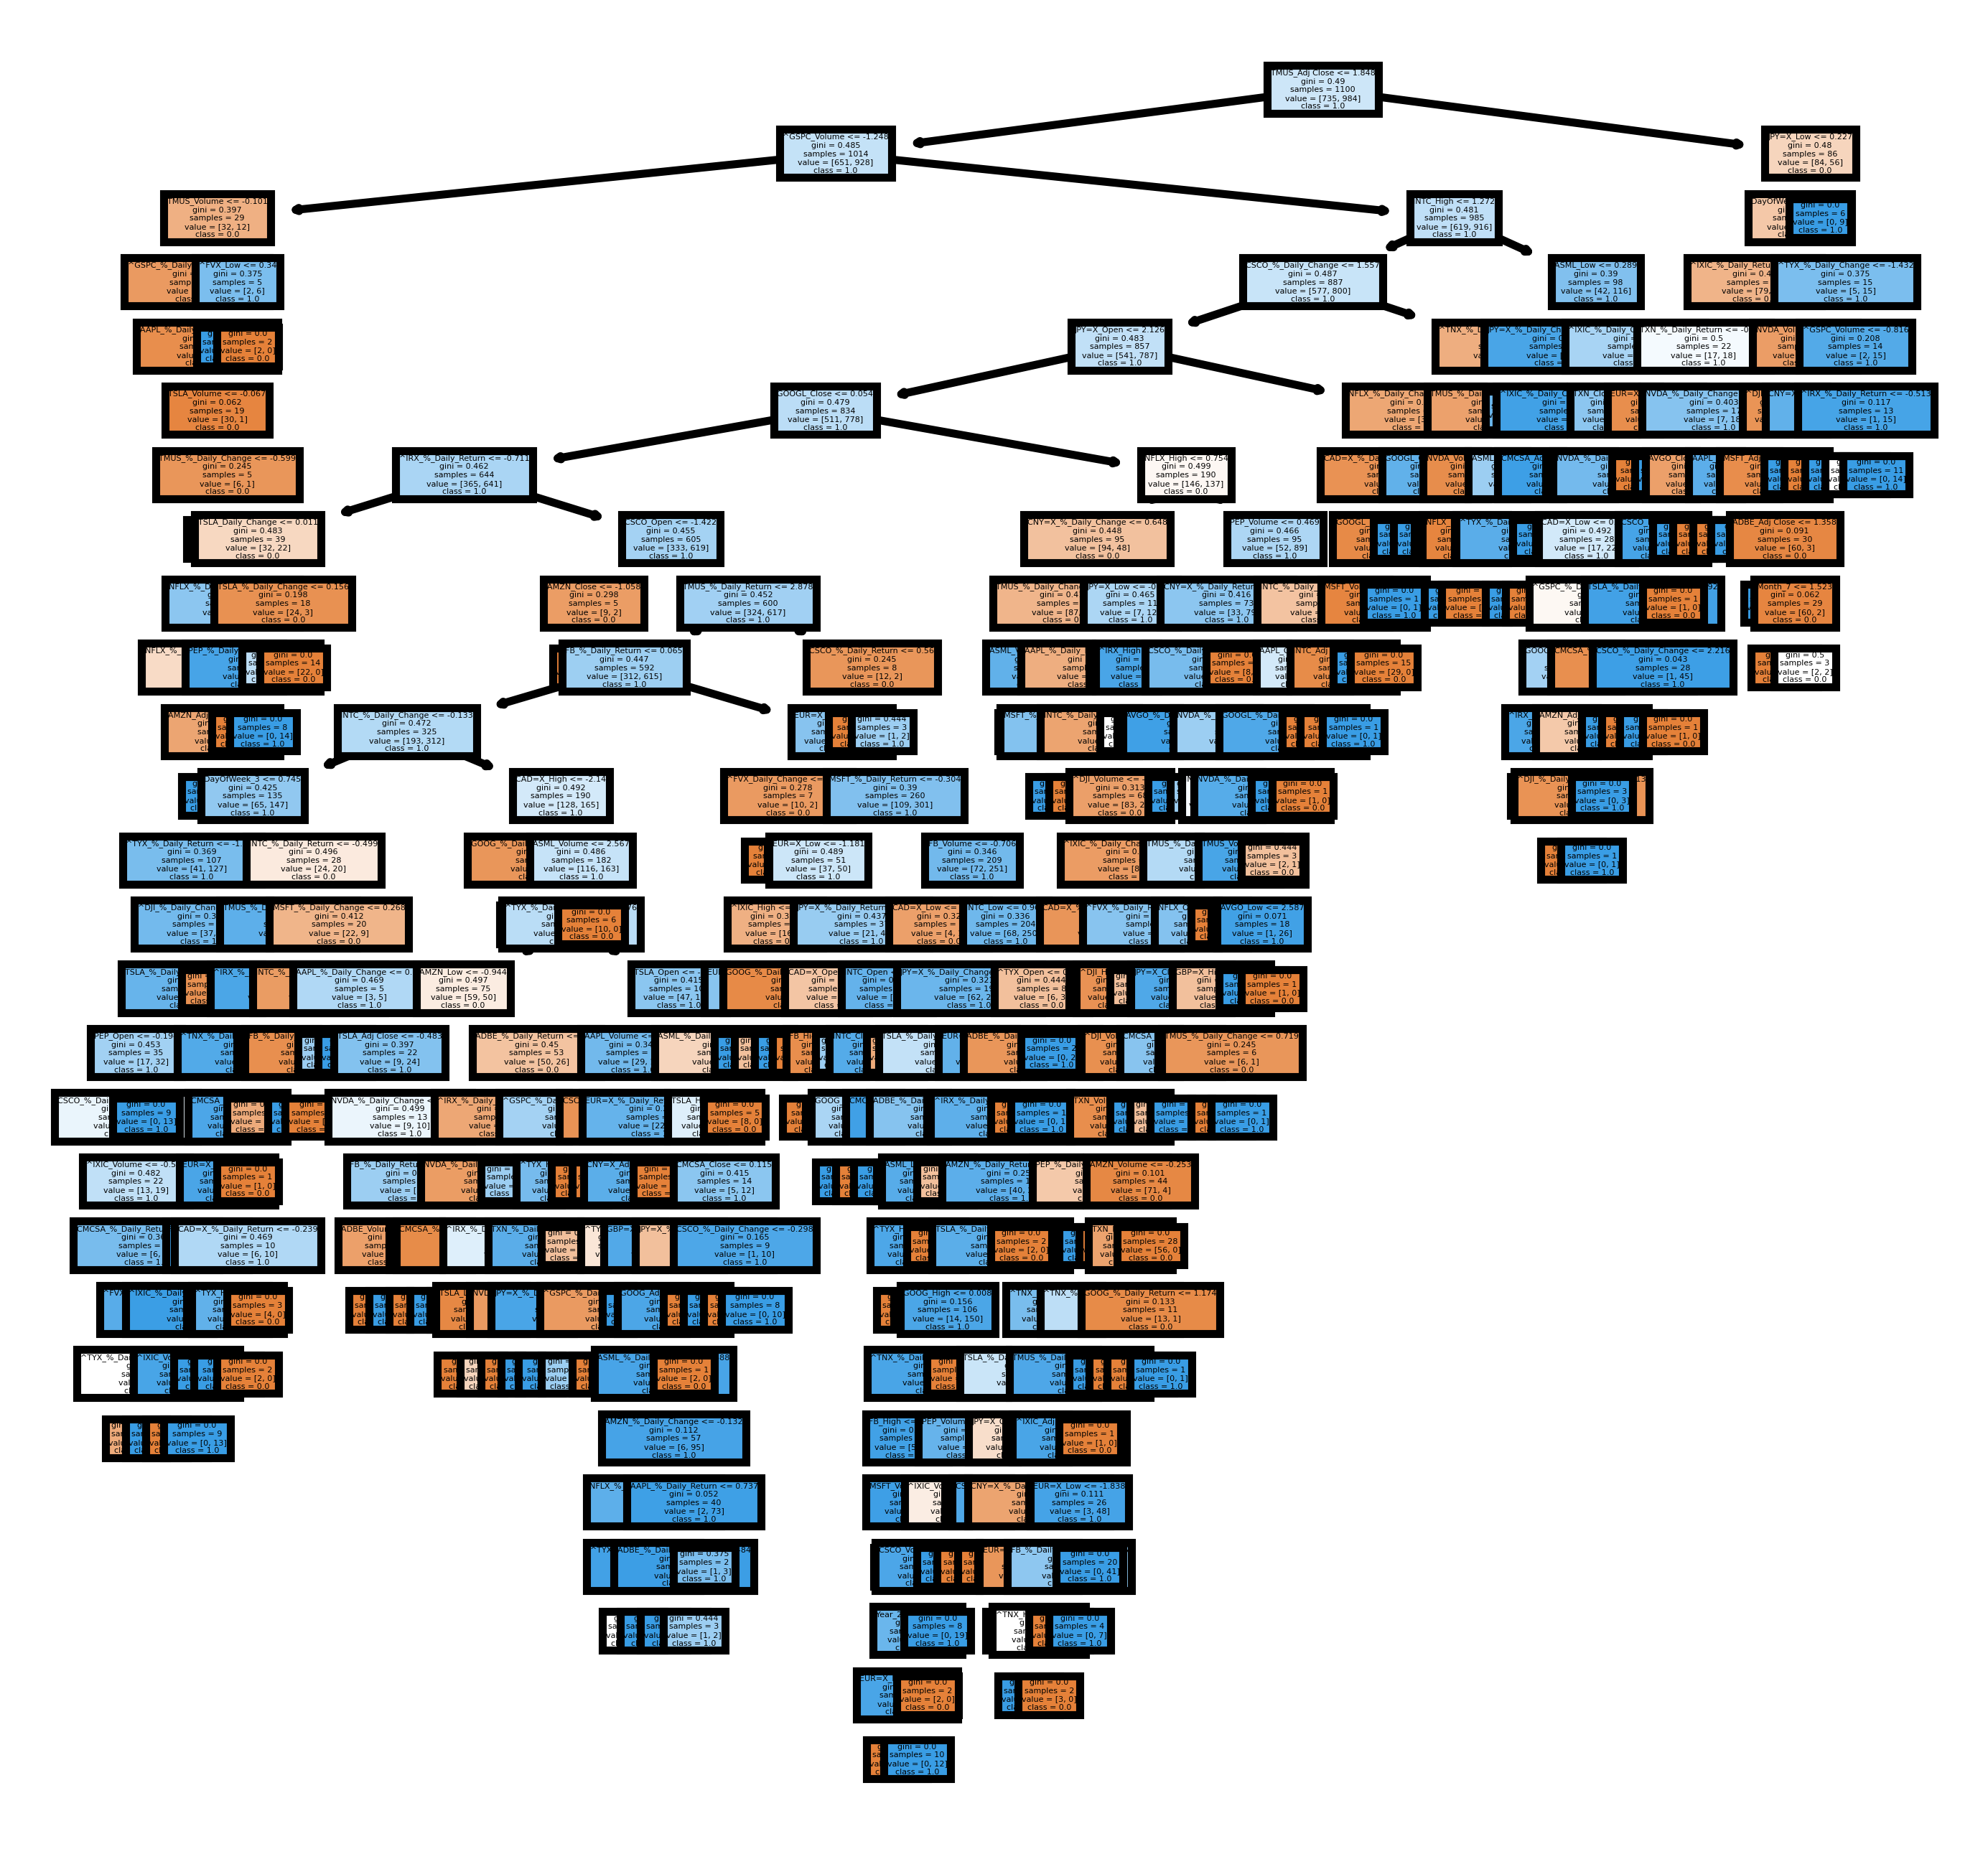

[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  18.6s
[CV] END bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  15.5s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  10.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  16.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  30.8s
[CV] END bootstrap=False, max_depth=30, min_samples_le

In [135]:
fn=df1.columns
cn=df['^IXIC_tmr_Change']
cn=[str(x) for x in cn]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_random.best_estimator_.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')